In [1]:
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load Data

In [2]:
dfHistorical = pd.read_csv('Datasets/Historical_MVPdata.csv')
dfCurrent = pd.read_csv('Datasets/CurrentMVP.csv')

# dfHistorical = pd.read_csv('Datasets/Historical_MVPdata_Without2011and2008.csv')
# dfCurrent = pd.read_csv('Datasets/2011MVP.csv')
# dfCurrent = pd.read_csv('Datasets/2008MVP.csv')

In [8]:
dfHistorical.head()

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,VORP,BPM
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,6.8,6.7
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,6.5,7.2
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,3.1,2.2
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,5.4,5.3
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1.5,0.0


# Data Profile

In [19]:
MVPdata = dfHistorical[dfHistorical.Rank == 1]
nonMVPdata = dfHistorical[dfHistorical.Rank != 1]

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,VORP,BPM
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,6.5,7.2
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,3.1,2.2
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,5.4,5.3
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1.5,0.0
5,5,Dennis Johnson,25,SEA,2.0,221,0.009,81.0,56.0,4,...,4.1,1.8,1.0,0.422,0.207,0.780,7.4,0.120,2.8,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,8,Damian Lillard,29,POR,23.0,1010,0.023,66.0,35.0,14,...,8.0,1.1,0.3,0.463,0.401,0.888,11.6,0.225,5.9,7.5
408,9,Nikola Joki?,24,DEN,18.0,1010,0.018,73.0,46.0,6,...,7.0,1.2,0.6,0.528,0.314,0.817,9.8,0.202,5.5,7.4
409,10,Pascal Siakam,25,TOR,17.0,1010,0.017,60.0,53.0,2,...,3.5,1.0,0.9,0.453,0.359,0.792,5.4,0.123,2.0,1.8
410,11,Jimmy Butler,30,MIA,9.0,1010,0.009,58.0,44.0,11,...,6.0,1.8,0.6,0.455,0.244,0.834,9.0,0.221,3.7,5.4


In [20]:
from pandas_profiling import ProfileReport
# profile_dfHistorical = ProfileReport(dfHistorical, title = 'NBA MVP Historical Data', html = { 'style' : {'full_width':True}})
# profile_dfHistorical.to_file("NBA MVP Historical Data.html")
# profile_dfHistorical
profile_dfHistorical = ProfileReport(nonMVPdata, title = 'non-NBA MVP Historical Data', html = { 'style' : {'full_width':True}})
profile_dfHistorical.to_file("non-MVP Historical Data.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]


# Feature Improtance by RandomForest

In [5]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

xtrain = train[['G', 'Team Wins', 'MP', 'WS/48', 'BPM', '3P%', 'FT%', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['G', 'Team Wins', 'MP', 'WS/48', 'BPM', '3P%', 'FT%', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [6]:
def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 5, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)

In [7]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'mse')
y_rf = []
scores(y_rf, rf)

Mean squared error: 0.030
R2 score: 0.645
R2 cross validation score: 0.44 (+/- 0.47)


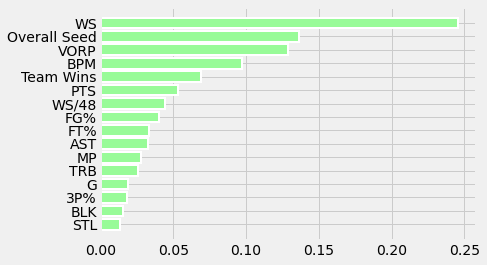

In [8]:
plt.style.use('fivethirtyeight')
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx], color= 'palegreen', edgecolor= 'white', linewidth = 2)
plt.savefig('image/RFfeatureimportance.jpeg', dpi = 400, bbox_inches = 'tight')

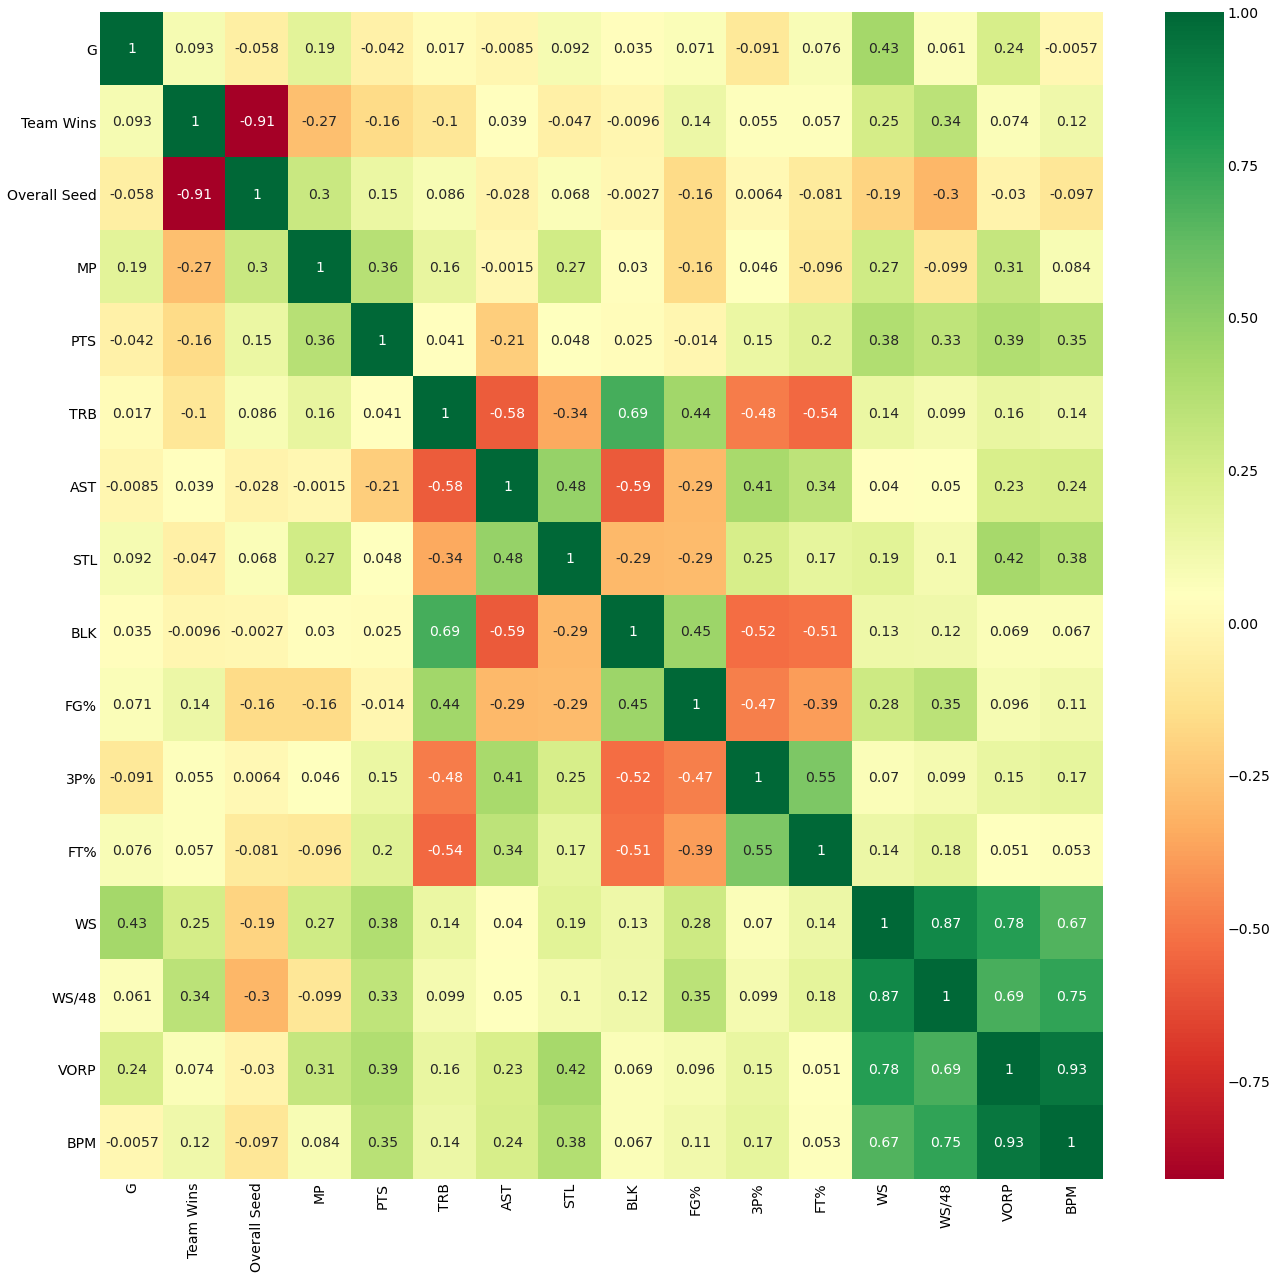

In [9]:
Historical = dfHistorical[['G','Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]

fig = plt.figure(figsize=(20, 20))
fig.set_facecolor('white')
sns.heatmap(Historical.corr(), annot=True, cmap='RdYlGn')
plt.savefig('image/corr_matrix.png')

# Model

In [10]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

# Share = (MVP votes on Player)/(Total MVP votes)
xtrain = train[['3P%', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['3P%', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [11]:
lr = LinearRegression(normalize = None)

y_lr = []

scores(y_lr, lr)

Mean squared error: 0.030
R2 score: 0.645
R2 cross validation score: 0.48 (+/- 0.70)


In [12]:
print('intercept =', '%.3f'%lr.intercept_)
print('coef =', lr.coef_)

intercept = -0.479
coef = [-0.22171343 -0.04672823 -0.02473507  0.0218107   0.01841139  0.0301163
 -0.65954548  0.02011608  0.032207  ]


In [13]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=10,
    max_iter=10000,
    random_state=50,
    activation='identity',
    learning_rate ='invscaling')

y_dnn = []

scores(y_dnn, dnn)

Mean squared error: 0.030
R2 score: 0.644
R2 cross validation score: 0.48 (+/- 0.71)


In [14]:
# param_grid = {
#     'hidden_layer_sizes': [9, 10 ,11],
#     # 'solver': ['lbfgs', 'adam'],
#     # 'activation': ['identity', 'Relu']
# }
# CV_dnn = GridSearchCV(estimator=dnn, param_grid=param_grid, cv=5)
# CV_dnn.fit(xtrain, ytrain)

# CV_dnn.best_params_

In [15]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 97, criterion = 'mse')

y_rf = []

scores(y_rf, rf)

Mean squared error: 0.032
R2 score: 0.618
R2 cross validation score: 0.41 (+/- 0.61)


In [16]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = 'uniform')

y_knn = []

scores(y_knn, knn)

Mean squared error: 0.030
R2 score: 0.643
R2 cross validation score: 0.52 (+/- 0.22)


# Predictions

In [17]:
dfCurrentNames = dfCurrent.iloc[:, 1]
dfCurrentPredict = dfCurrent[['3P%', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]

dfCurrent.head(10)

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,VORP,BPM
0,1,Nikola Joki?,25,DEN,72,47,5,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,11.7,8.6
1,2,Giannis Antetokounmpo,26,MIL,61,46,7,33.0,28.1,11.0,5.9,1.2,1.2,0.569,0.303,0.685,10.2,0.244,5.5,8.8
2,3,Joel Embiid,26,PHI,51,49,3,31.1,28.5,10.6,2.8,1.0,1.4,0.513,0.377,0.859,8.8,0.266,3.7,7.2
3,4,Kawhi Leonard,29,LAC,52,47,6,34.1,24.8,6.5,5.2,1.6,0.4,0.512,0.398,0.885,8.8,0.238,3.9,6.7
4,5,Jimmy Butler,31,MIA,52,40,13,33.6,21.5,6.9,7.1,2.1,0.3,0.497,0.245,0.863,9.3,0.255,4.2,7.5
5,6,Damian Lillard,30,POR,67,42,10,35.8,28.8,4.2,7.5,0.9,0.3,0.451,0.391,0.928,10.4,0.209,4.8,5.9
6,7,Rudy Gobert,28,UTA,71,52,1,30.8,14.3,13.5,1.3,0.6,2.7,0.675,0.000,0.623,11.3,0.248,3.6,4.5
7,8,Luka Don?i?,21,DAL,66,42,9,34.3,27.7,8.0,8.6,1.0,0.5,0.479,0.350,0.730,7.7,0.163,5.0,6.7
8,9,Kyrie Irving,28,BRK,54,48,4,34.9,26.9,4.8,6.0,1.4,0.7,0.506,0.402,0.922,7.4,0.189,3.5,5.3
9,10,Stephen Curry,32,GSW,63,39,14,34.2,32.0,5.5,5.8,1.2,0.1,0.482,0.421,0.916,9.0,0.201,5.5,8.1


In [18]:
def show(Predict, model = None): 

    ListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, Predict)]
    DataUnsorted = [row[1] for row in ListUnsorted]
    List = sorted(ListUnsorted, key = itemgetter(1), reverse = True)

    Data = [row[1] for row in List]
    Names = [row[0] for row in List]
    # print(List)

    x = np.arange(len(Data))

    plt.style.use('fivethirtyeight')

    ml, ax = plt.subplots()

    ax.bar(x, Data, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

    labels = Names

    rects = ax.patches
    for rect, label in zip(rects, labels):
        if rect.get_x() > 10:
            ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')
        elif rect.get_x() <= 10:
            height = .03
            ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')
            
    title = model + ' predicted MVP share'
    ml.suptitle( title, weight = 'bold', size = 18, y = 1.005)
    ax.xaxis.set_visible(False)
    ax.set_ylabel("Vote Share")

    ml.text(x = -0.02, y = 0.03,
        s = '_______________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')


    SaveTitle = 'image/' + model + '.png'
    ml.savefig(SaveTitle, dpi = 400, bbox_inches = 'tight')

    return DataUnsorted

# Linear Regression

Nikola Joki? 0.640
Giannis Antetokounmpo 0.282
Joel Embiid 0.237
Kawhi Leonard 0.051
Jimmy Butler -0.087
Damian Lillard 0.210
Rudy Gobert 0.059
Luka Don?i? 0.217
Kyrie Irving 0.098
Stephen Curry 0.082


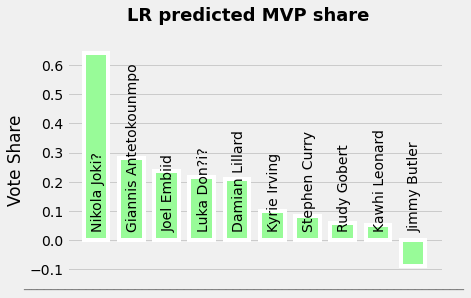

In [19]:
lrPredict = lr.predict(dfCurrentPredict)
lrPredict = lrPredict.tolist()

for (i, j) in zip(dfCurrentNames, lrPredict):
    print(i, '%.3f'%j)

lrDataUnsorted = show(lrPredict, 'LR')

# DNN

Nikola Joki? 0.642
Giannis Antetokounmpo 0.285
Joel Embiid 0.239
Kawhi Leonard 0.054
Jimmy Butler -0.086
Damian Lillard 0.209
Rudy Gobert 0.064
Luka Don?i? 0.218
Kyrie Irving 0.101
Stephen Curry 0.083


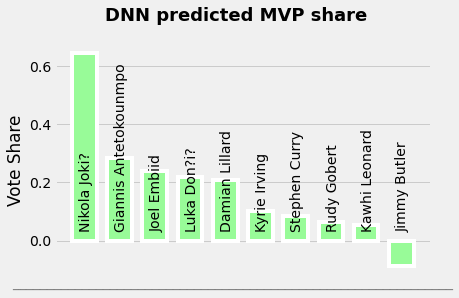

In [20]:
dnnPredict = dnn.predict(dfCurrentPredict)
dnnPredict = dnnPredict.tolist()

for (i, j) in zip(dfCurrentNames, dnnPredict):
    print(i, '%.3f'%j)

dnnDataUnsorted = show(dnnPredict, model = 'DNN')

# RF

Nikola Joki? 0.489
Giannis Antetokounmpo 0.170
Joel Embiid 0.156
Kawhi Leonard 0.062
Jimmy Butler 0.018
Damian Lillard 0.123
Rudy Gobert 0.367
Luka Don?i? 0.089
Kyrie Irving 0.135
Stephen Curry 0.191


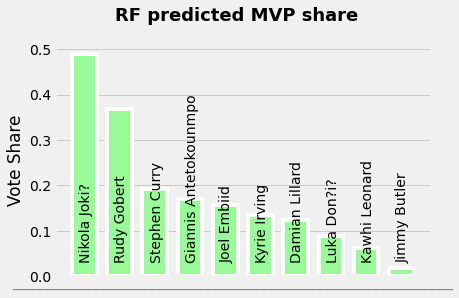

In [21]:
rfPredict = rf.predict(dfCurrentPredict)
rfPredict = rfPredict.tolist()

for (i, j) in zip(dfCurrentNames, rfPredict):
    print(i, '%.3f'%j)

rfDataUnsorted = show(rfPredict, model = 'RF')

# KNN

Nikola Joki? 0.622
Giannis Antetokounmpo 0.139
Joel Embiid 0.247
Kawhi Leonard 0.161
Jimmy Butler 0.037
Damian Lillard 0.154
Rudy Gobert 0.074
Luka Don?i? 0.154
Kyrie Irving 0.183
Stephen Curry 0.142


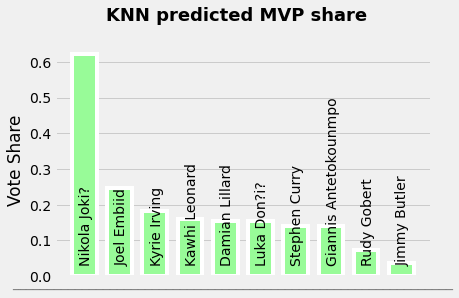

In [22]:
knnPredict = knn.predict(dfCurrentPredict)
knnPredict = knnPredict.tolist()

for (i, j) in zip(dfCurrentNames, knnPredict):
    print(i, '%.3f'%j)

knnDataUnsorted = show(knnPredict, model = 'KNN')

# Average Results

In [23]:
avgPredict = []

for (i, j, h, k) in zip(lrDataUnsorted, rfDataUnsorted, knnDataUnsorted, dnnDataUnsorted):
    avgPredict.append((i + j + h + k) / 4)

avgList = [[i, j] for i, j in zip(dfCurrentNames, avgPredict)]
avgList = sorted(avgList, key = itemgetter(1), reverse = True)

avgData = [row[1] for row in avgList]
avgNames = [row[0] for row in avgList]
# print(avgList)

x_avg = np.arange(len(avgData))

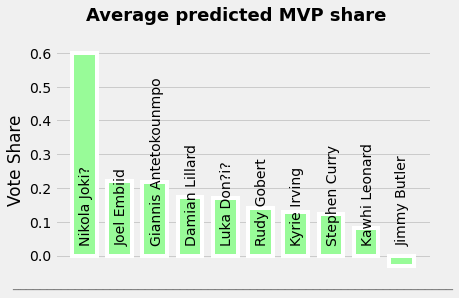

In [24]:
plt.style.use('fivethirtyeight')

avg, ax = plt.subplots()

ax.bar(x_avg, avgData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = avgNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 10:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 10:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg.suptitle("Average predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

avg.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


avg.savefig('image/avg.jpeg', dpi = 400, bbox_inches = 'tight')